# Mounting Drive and loading DataFrame

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [ ]:
# Installing gower
!pip3 install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip3 install --upgrade scikit-learn

In [ ]:
import gower

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataframe.csv')

In [ ]:
df.shape

(2216327, 11)

In [ ]:
df.head(5)

,Health Service Area,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description
0,Western NY,30 to 49,F,White,Not Span/Hispanic,4,Elective,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical
1,Western NY,70 or Older,F,White,Not Span/Hispanic,4,Urgent,"Diseases and Disorders of the Skin, Subcutaneo...",Major,Major,Medical
2,Western NY,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical
3,Western NY,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Diseases and Disorders of the Respiratory System,Minor,Minor,Medical
4,Western NY,70 or Older,F,White,Not Span/Hispanic,3,Elective,Diseases and Disorders of the Respiratory System,Moderate,Moderate,Medical


In [ ]:
def plot_dataframe_head(df, n=5, filename='dataframe_head.png'):
    head_df = df.head(n)
    fig, ax = plt.subplots(figsize=(10, n*0.5))  # Adjust the figsize to fit your DataFrame
    ax.axis('off')
    
    # Use the table function from matplotlib to create the table
    table = ax.table(cellText=head_df.values, colLabels=head_df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(2, 3)  # Adjust the scaling factors to fit your DataFrame
    
    # Save the figure as a PNG file
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close(fig)


# df = pd.read_csv('your_data.csv')

plot_dataframe_head(df.loc[5:10,:'Type of Admission'], n=5, filename='dataframe_head.png')

In [ ]:
cat_columns = df.select_dtypes(include=['object', 'category']).columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False)
cat_encoded = pd.DataFrame(encoder.fit_transform(df[cat_columns]), columns=encoder.get_feature_names_out(cat_columns))

# Scale numerical columns
scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(df[num_columns]), columns=num_columns)

# Combine the preprocessed categorical and numerical data
df_processed = pd.concat([cat_encoded, num_scaled], axis=1)

In [ ]:
df_processed.head(5)

,Health Service Area_Capital/Adirond,Health Service Area_Central NY,Health Service Area_Finger Lakes,Health Service Area_Hudson Valley,Health Service Area_Long Island,Health Service Area_New York City,Health Service Area_Southern Tier,Health Service Area_Western NY,Age Group_0 to 17,Age Group_18 to 29,...,APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,APR Risk of Mortality_Extreme,APR Risk of Mortality_Major,APR Risk of Mortality_Minor,APR Risk of Mortality_Moderate,APR Medical Surgical Description_Medical,APR Medical Surgical Description_Surgical,Length of Stay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.199946
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.199946
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.321477
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.564539
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.321477


In [ ]:
# Uploading Dataframe as CSV to use 
df_processed.to_csv('dataframe_processed.csv', index = False)
!cp dataframe_processed.csv "drive/My Drive/"

# Creating Dictionary for Encoding

In [ ]:
# Made from previous notebook

column_dictionaries = [{0: 'Western NY',
  1: 'Finger Lakes',
  2: 'Central NY',
  3: 'Southern Tier',
  4: 'Capital/Adirond',
  5: 'Hudson Valley',
  6: 'New York City',
  7: 'Long Island'},
 {0: '30 to 49', 1: '70 or Older', 2: '0 to 17', 3: '18 to 29', 4: '50 to 69'},
 {0: 'F', 1: 'M'},
 {0: 'White', 1: 'Black/African American', 2: 'Other Race'},
 {0: 'Not Span/Hispanic', 1: 'Spanish/Hispanic'},
 {0: 'placeholder for L.O.S'},
 {0: 'Elective', 1: 'Urgent', 2: 'Emergency', 3: 'Trauma'},
 {0: 'Diseases and Disorders of the Respiratory System',
  1: 'Diseases and Disorders of the Skin, Subcutaneous Tissue and Breast',
  2: 'Diseases and Disorders of the Digestive System',
  3: 'Ear, Nose, Mouth, Throat and Craniofacial Diseases and Disorders',
  4: 'Diseases and Disorders of the Kidney and Urinary Tract',
  5: 'Infectious and Parasitic Diseases, Systemic or Unspecified Sites',
  6: 'Endocrine, Nutritional and Metabolic Diseases and Disorders',
  7: 'Poisonings, Toxic Effects, Other Injuries and Other Complications of Treatment',
  8: 'Diseases and Disorders of the Circulatory System',
  9: 'Diseases and Disorders of the Musculoskeletal System and Conn Tissue',
  10: 'Diseases and Disorders of the Nervous System',
  11: 'Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts',
  12: 'Mental Diseases and Disorders',
  13: 'Diseases and Disorders of the Hepatobiliary System and Pancreas',
  14: 'Diseases and Disorders of the Female Reproductive System',
  15: 'Pregnancy, Childbirth and the Puerperium',
  16: 'Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders',
  17: 'Diseases and Disorders of Blood, Blood Forming Organs and Immunological Disorders',
  18: 'Newborns and Other Neonates with Conditions Originating in the Perinatal Period',
  19: 'Human Immunodeficiency Virus Infections',
  20: 'Diseases and Disorders of the Eye',
  21: 'Multiple Significant Trauma',
  22: 'Diseases and Disorders of the Male Reproductive System',
  23: 'Lymphatic, Hematopoietic, Other Malignancies, Chemotherapy and Radiotherapy',
  24: 'Burns'},
 {0: 'Minor', 1: 'Major', 2: 'Moderate', 3: 'Extreme'},
 {0: 'Minor', 1: 'Major', 2: 'Moderate', 3: 'Extreme'},
 {0: 'Medical', 1: 'Surgical'}]

# Relationship between Variables

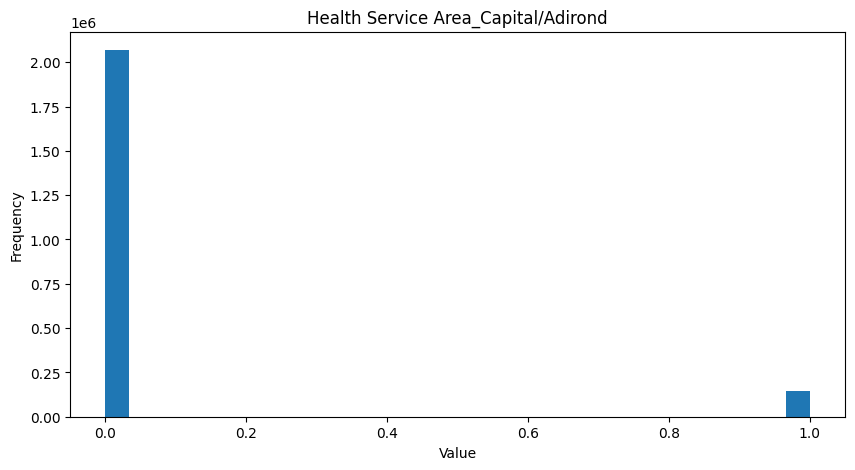

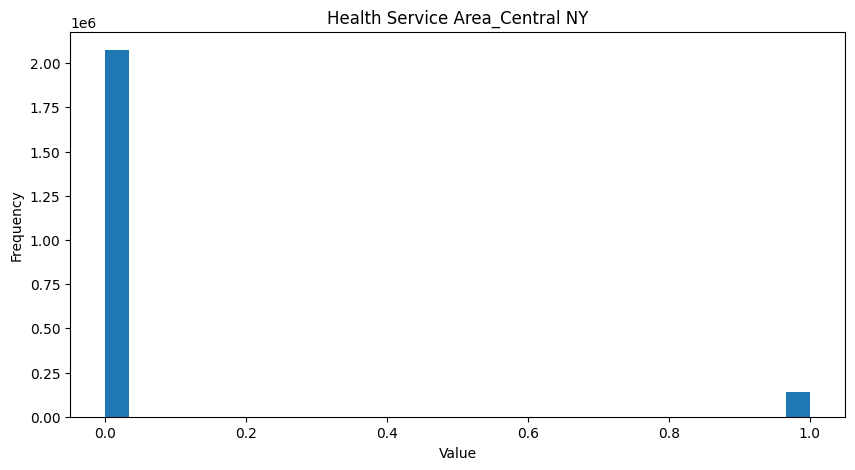

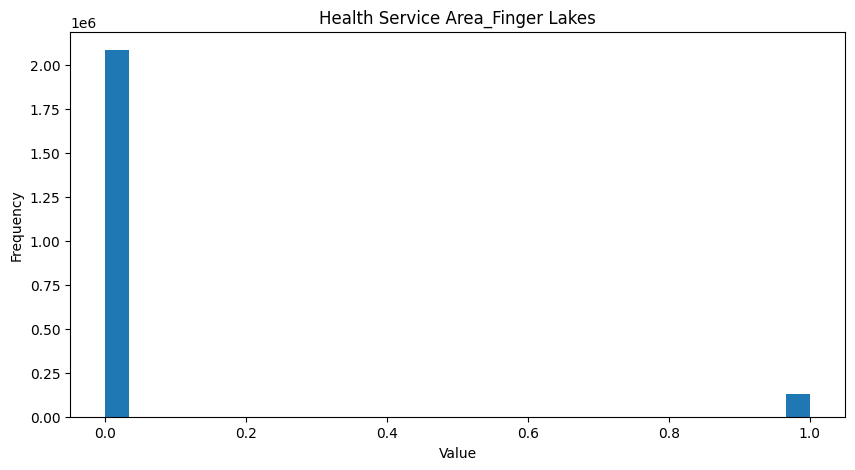

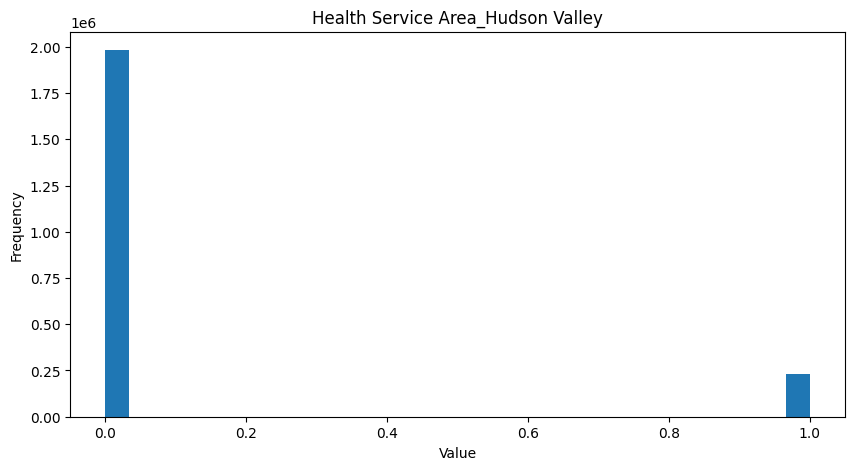

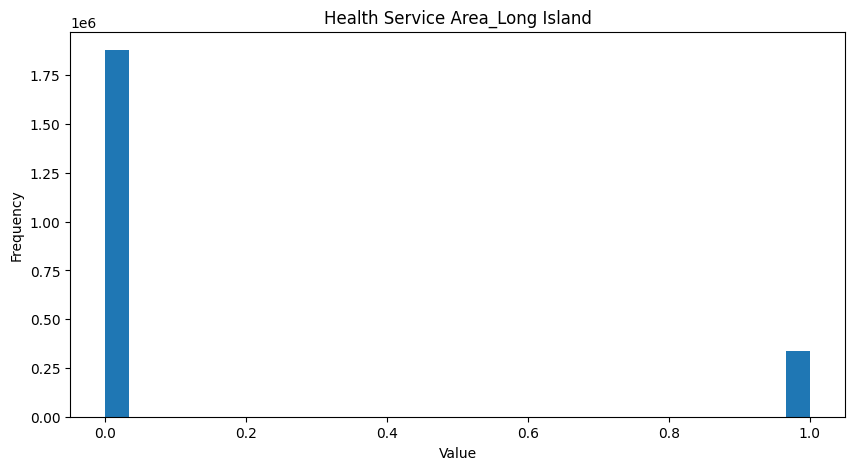

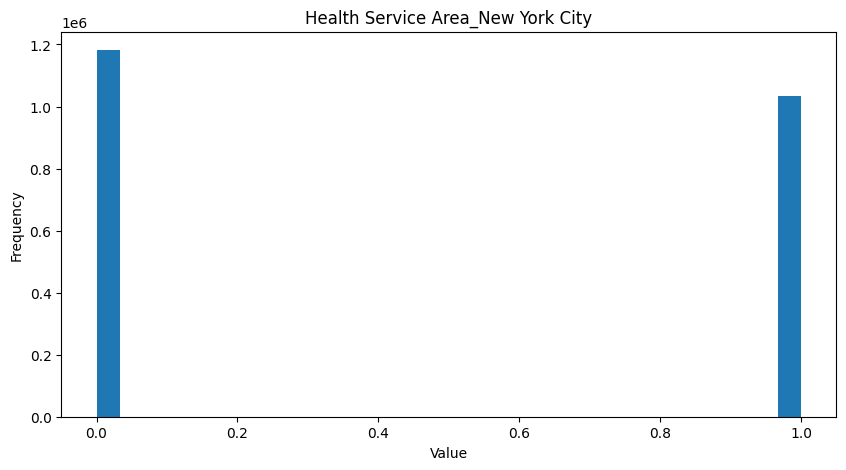

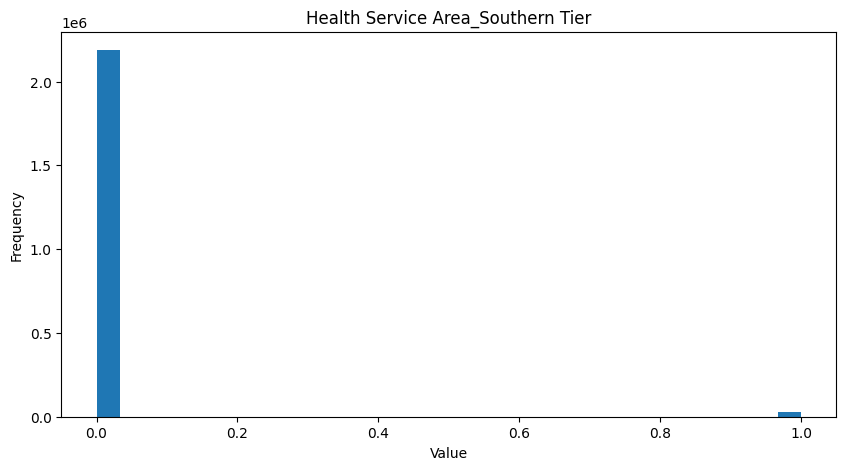

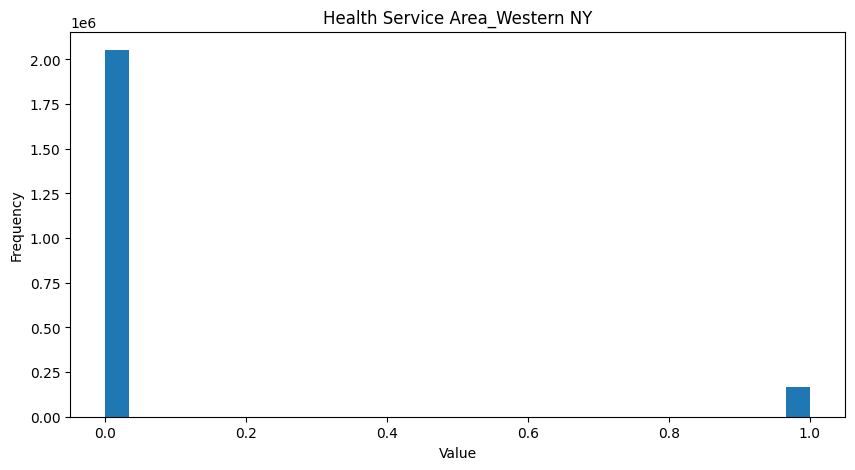

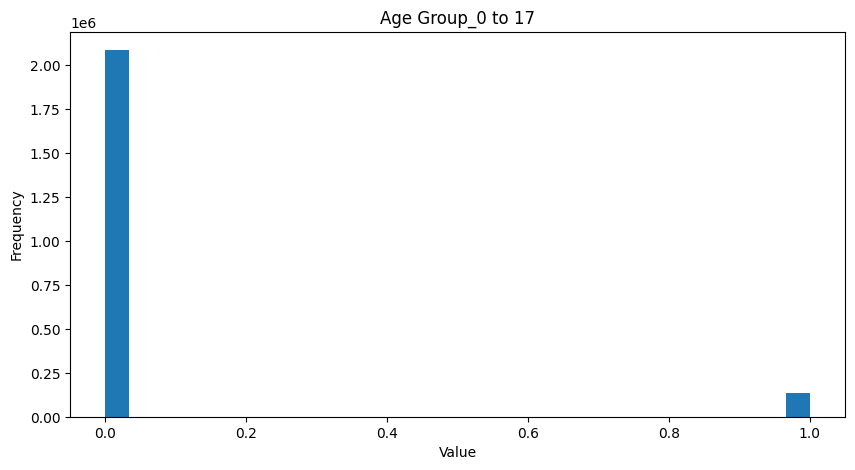

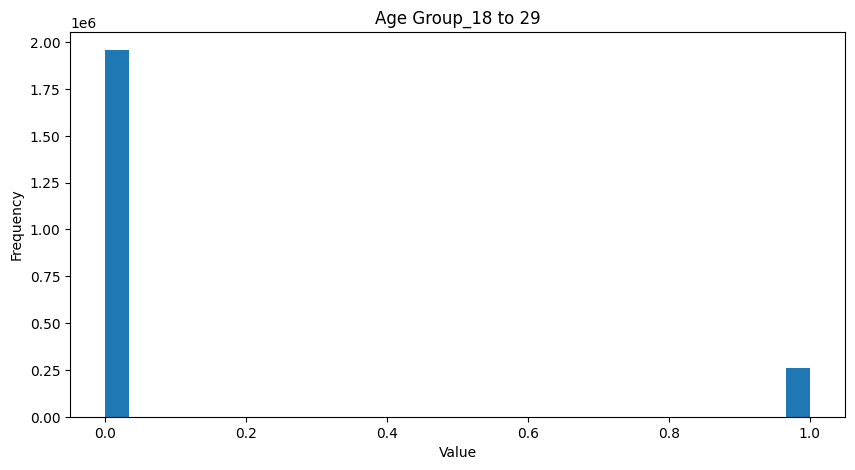

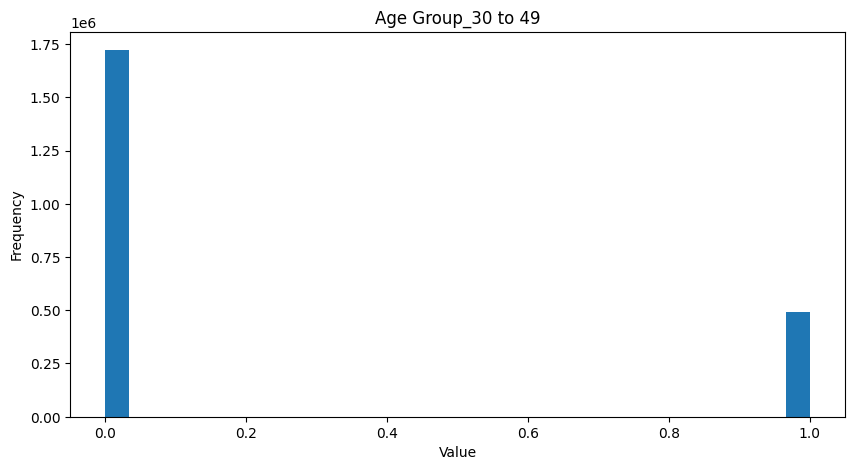

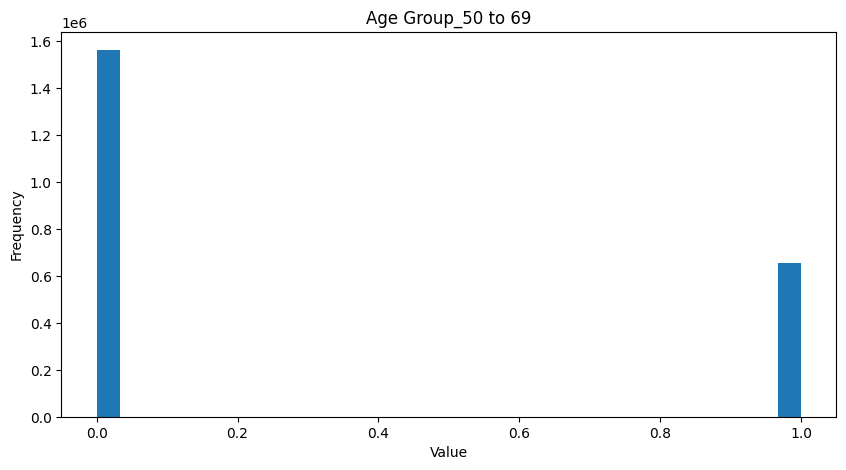

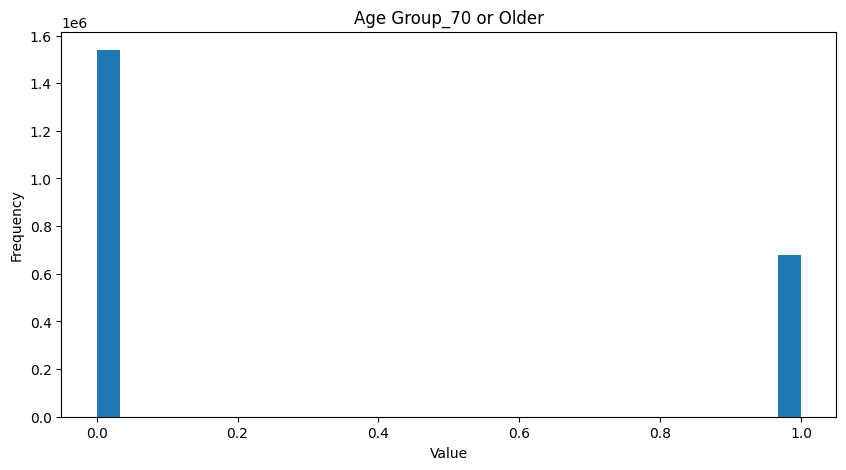

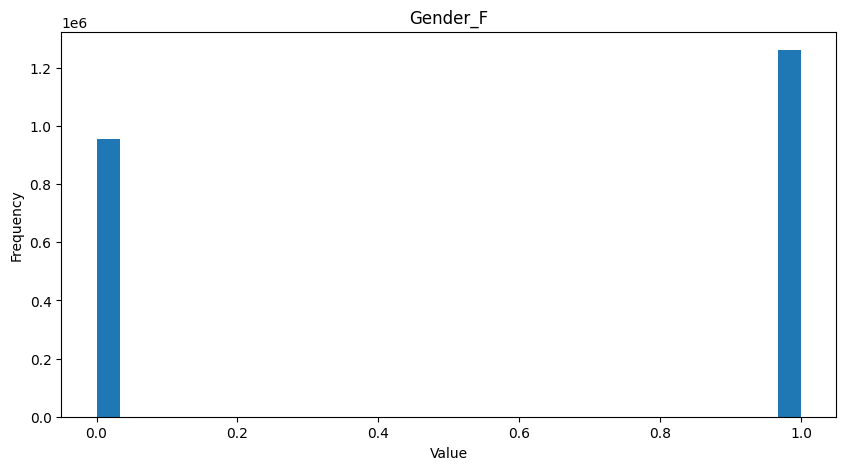

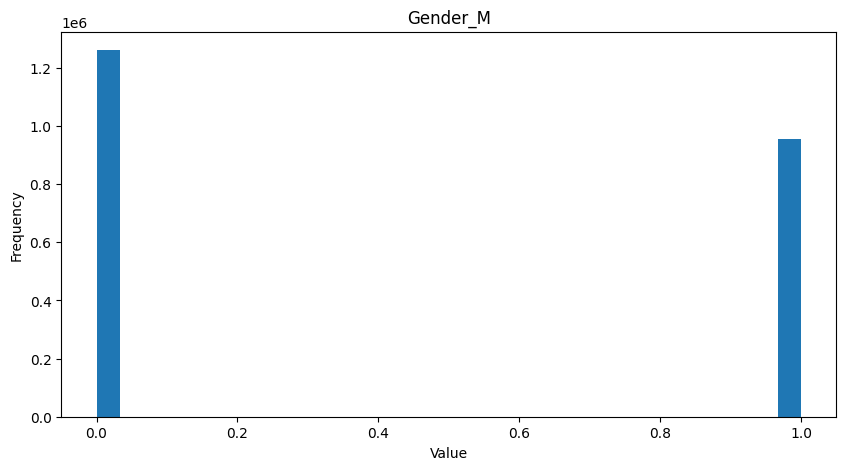

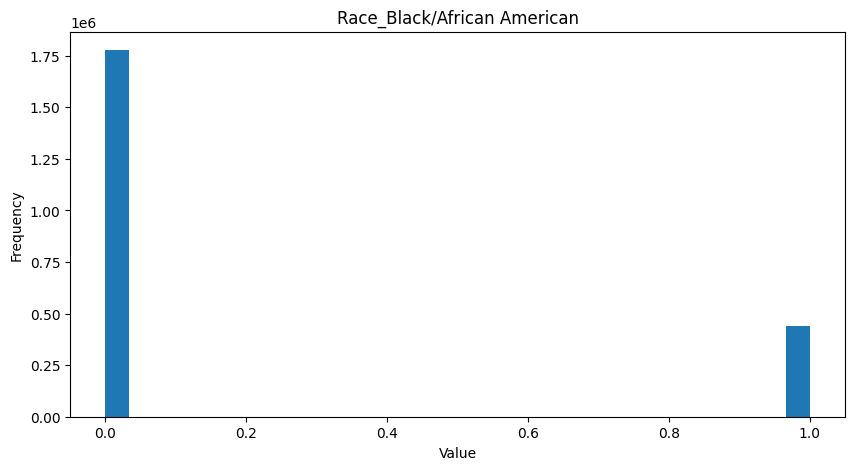

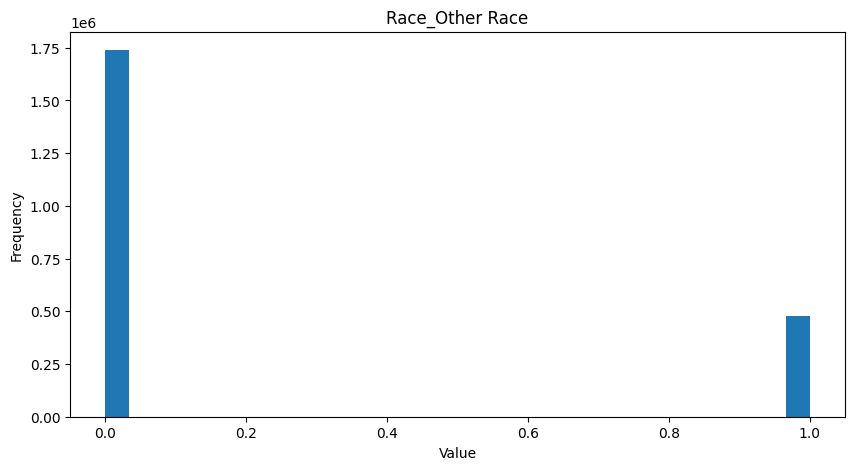

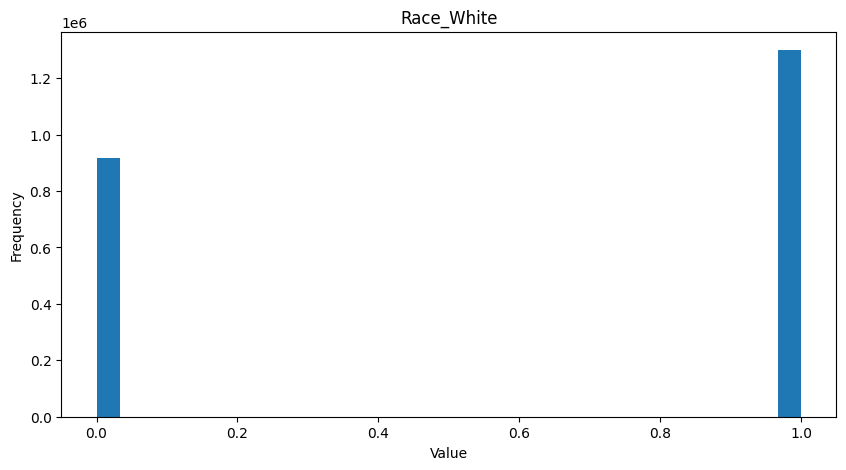

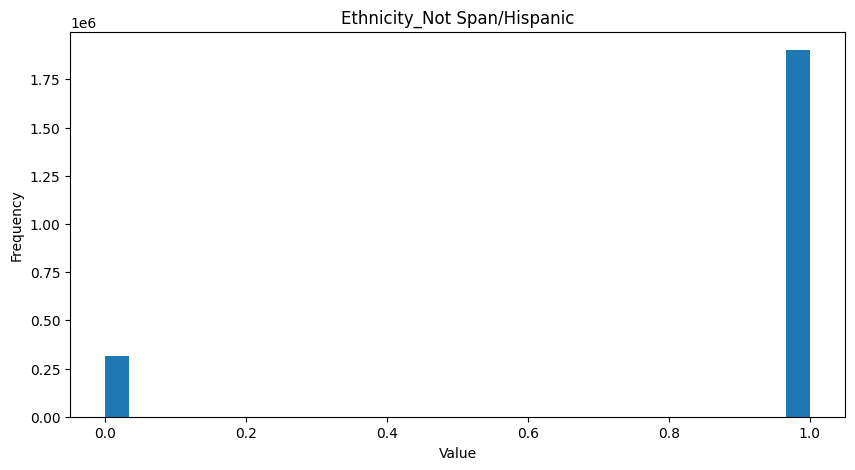

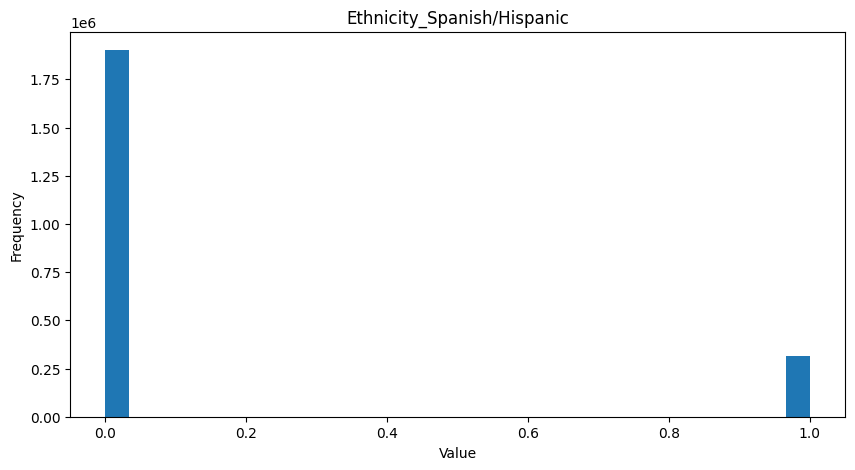

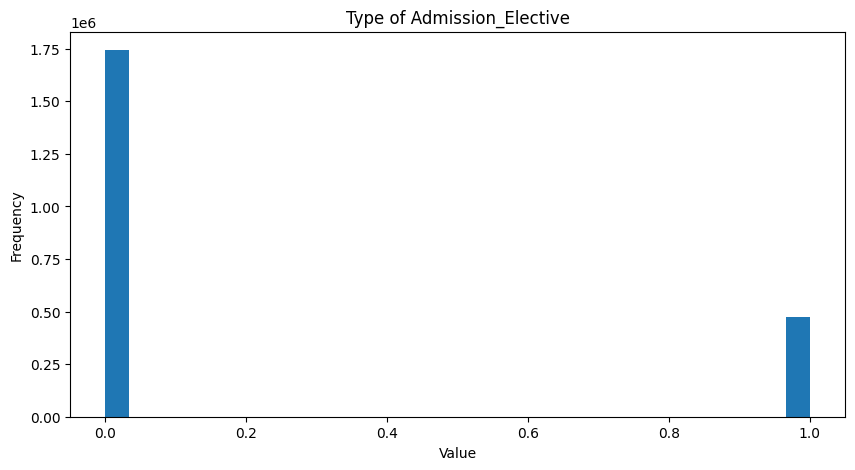

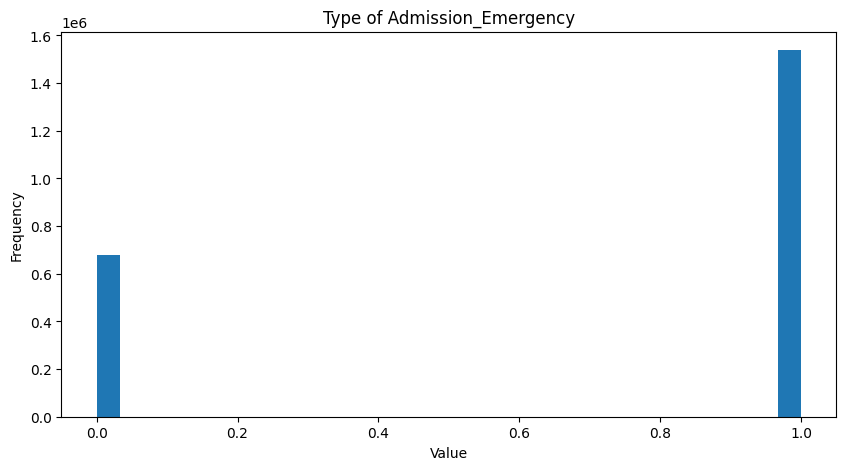

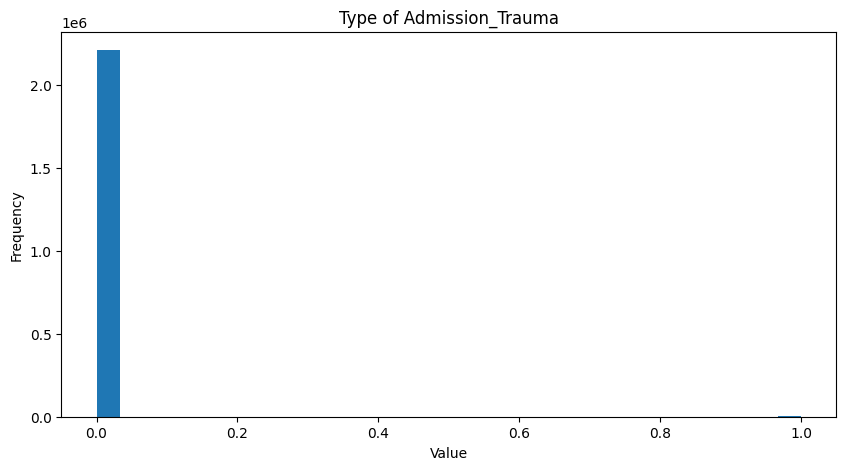

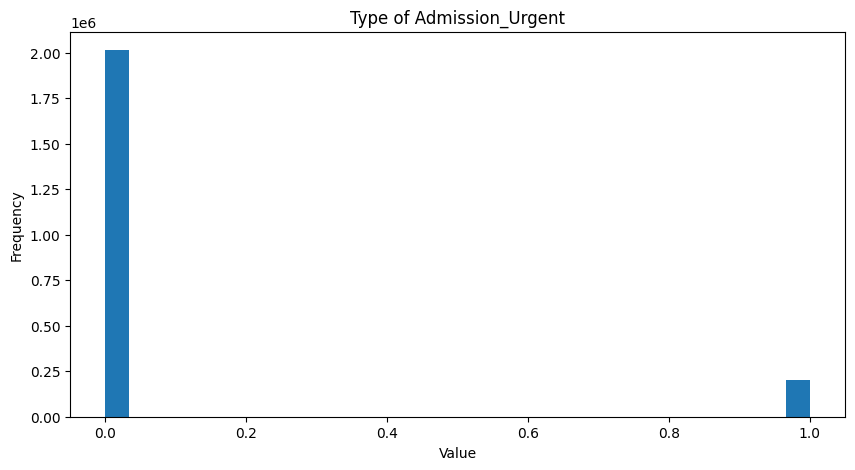

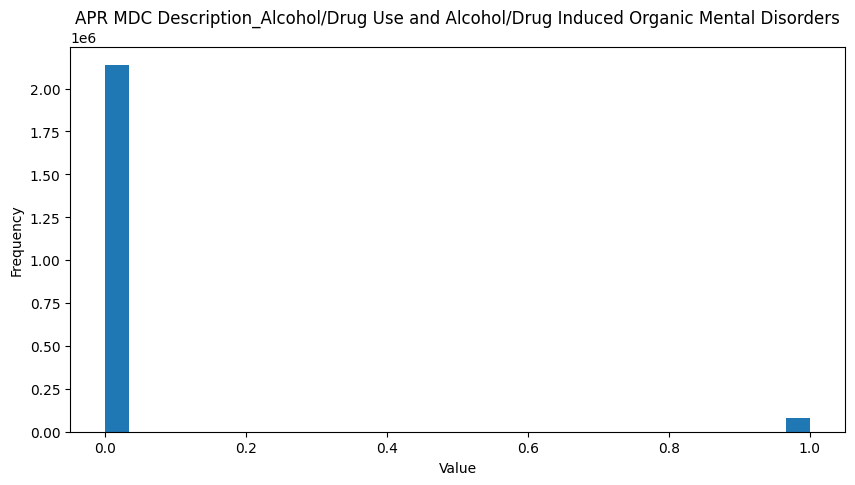

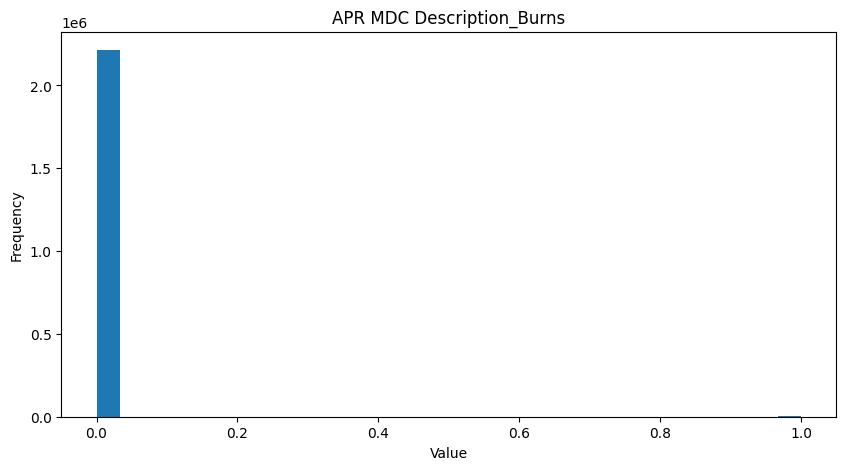

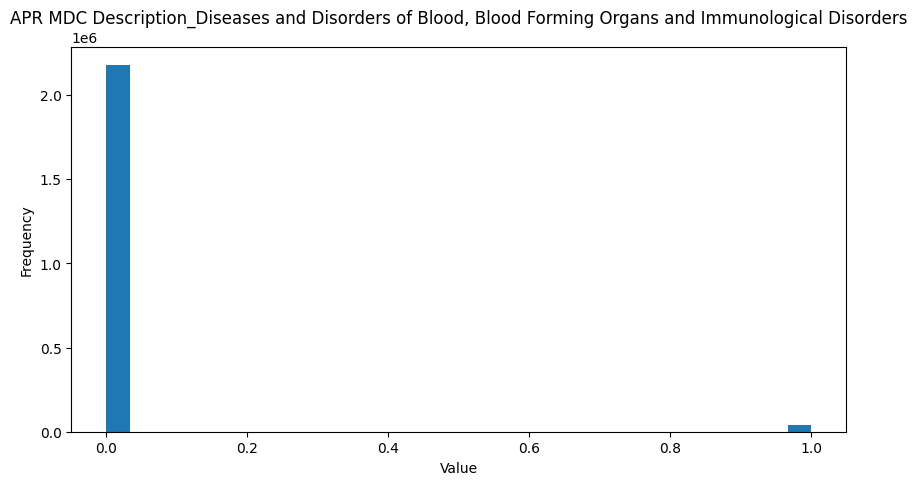

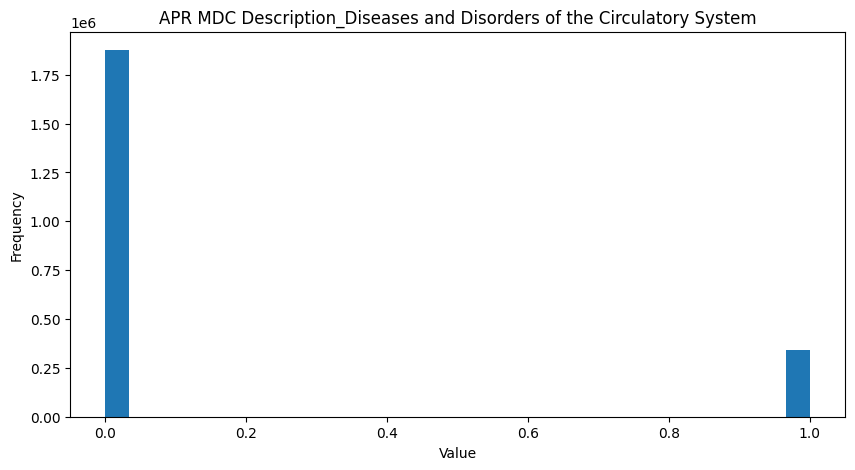

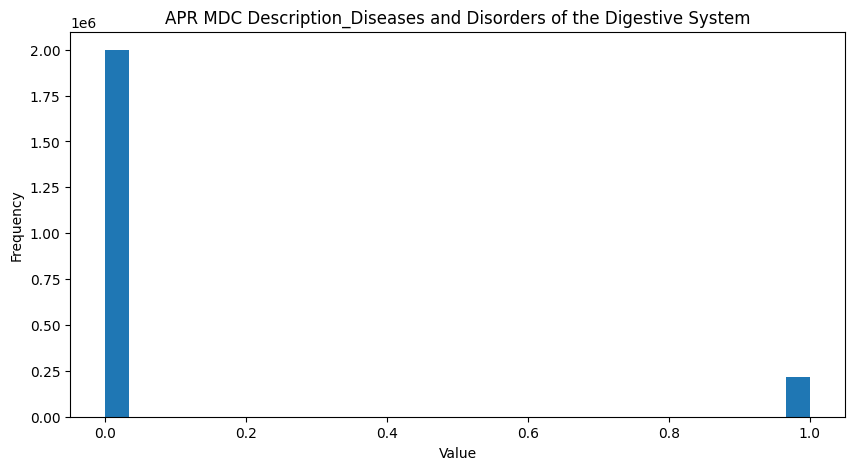

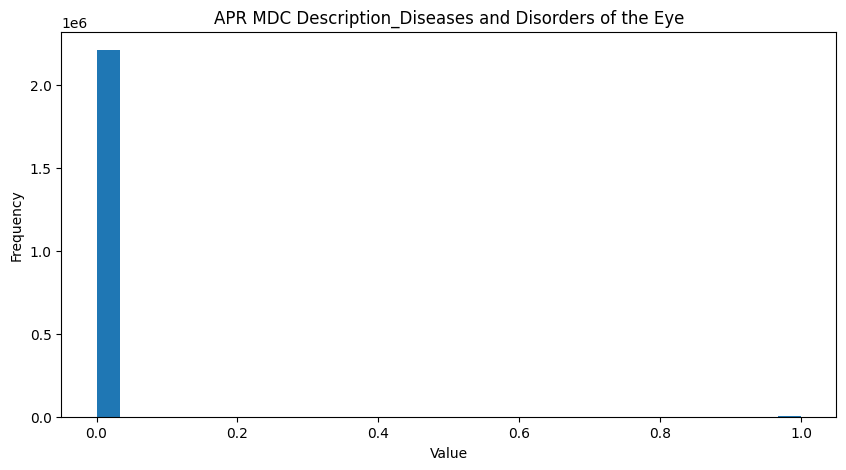

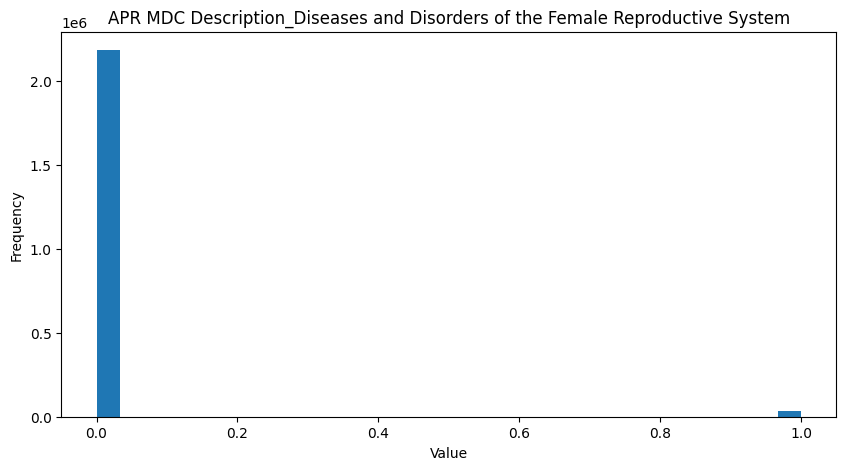

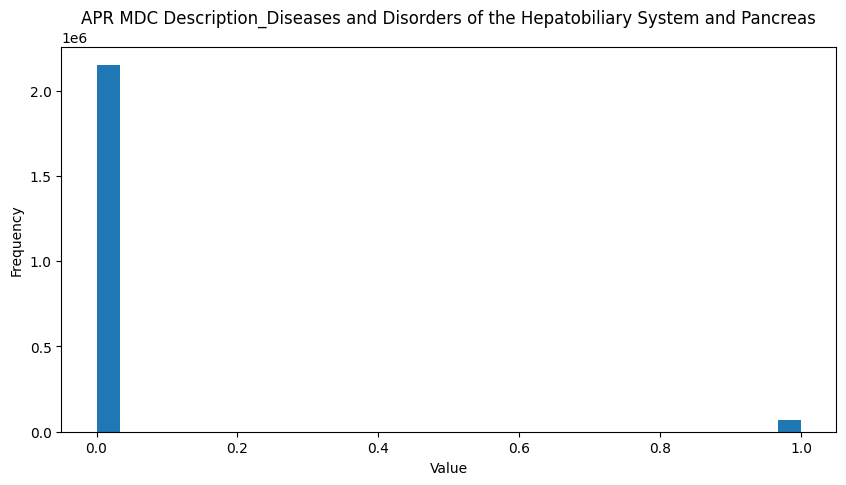

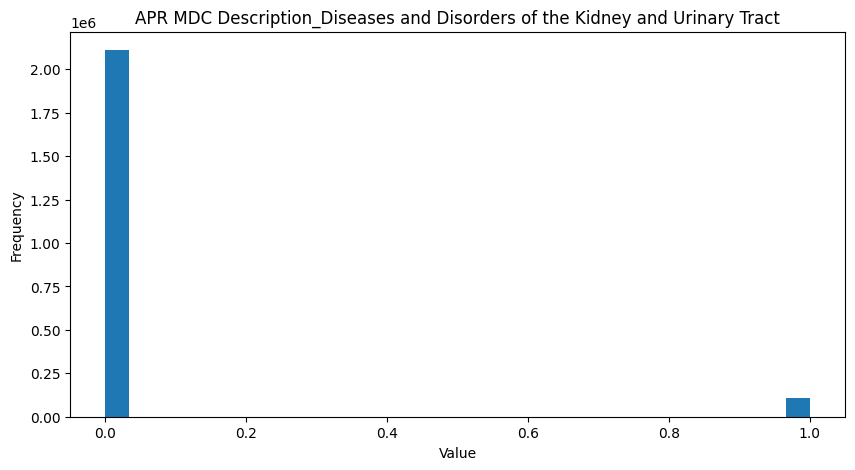

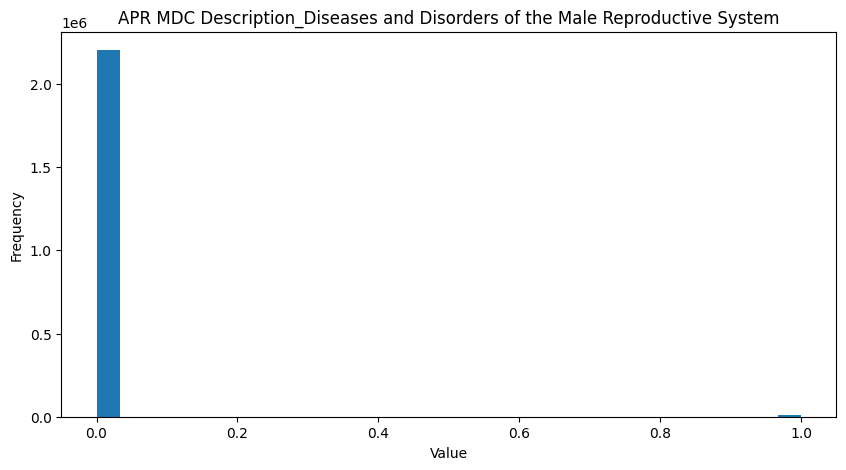

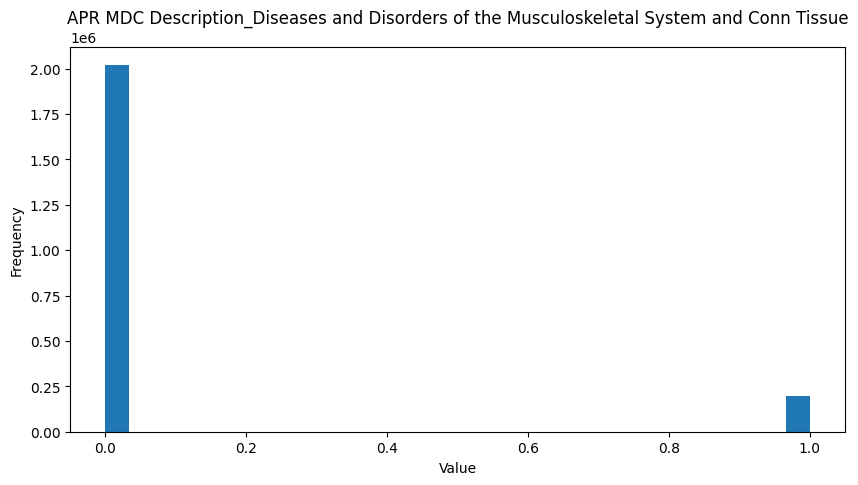

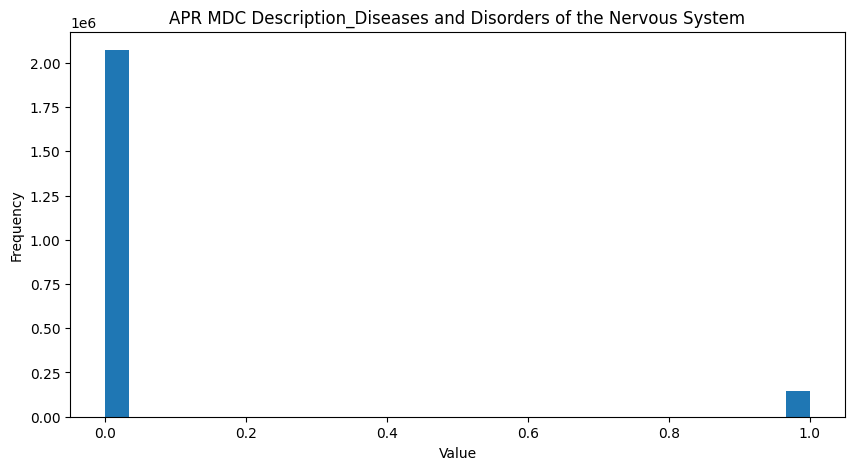

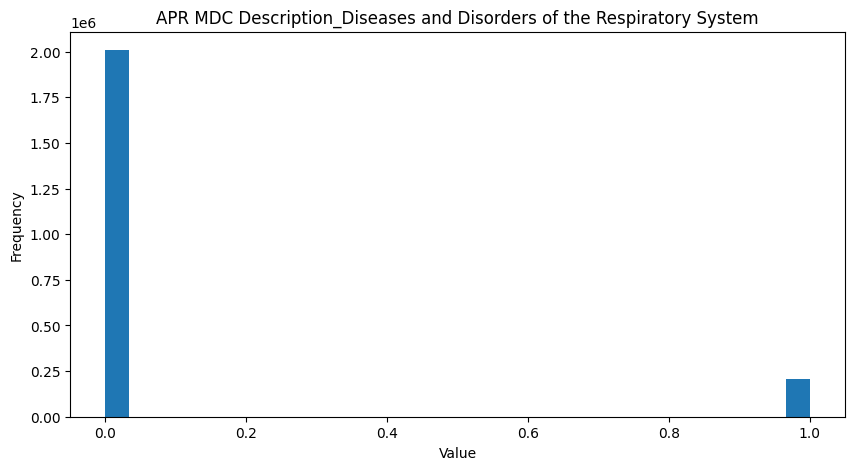

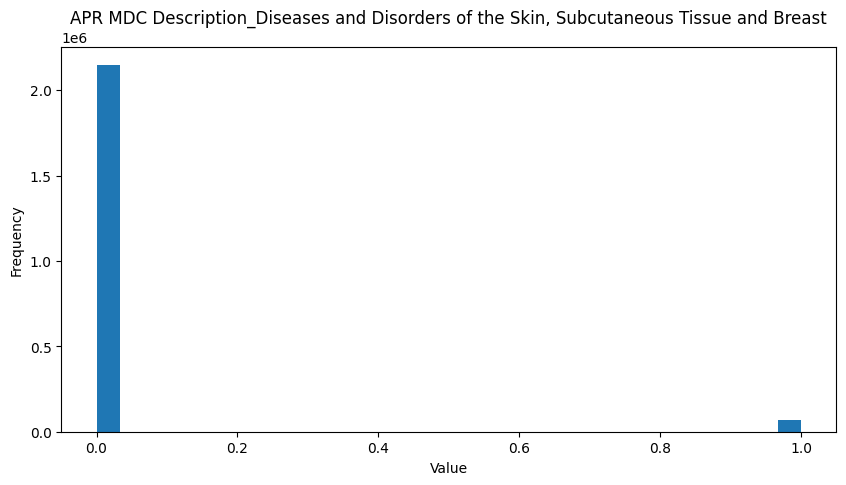

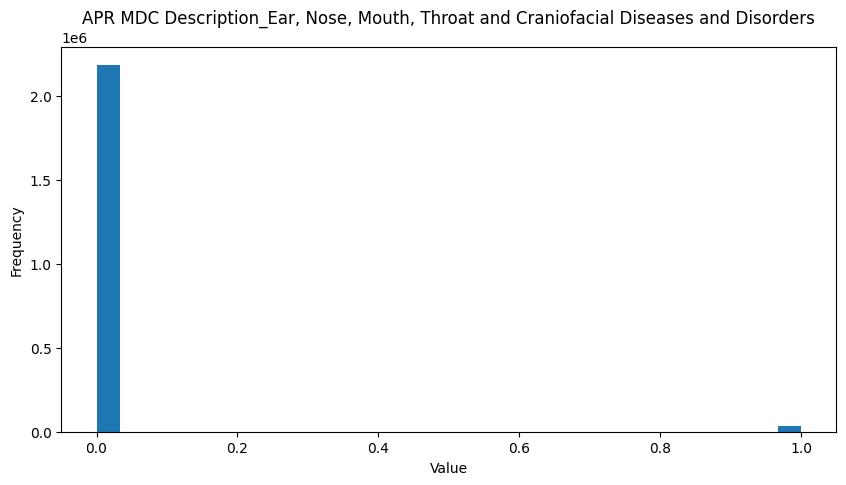

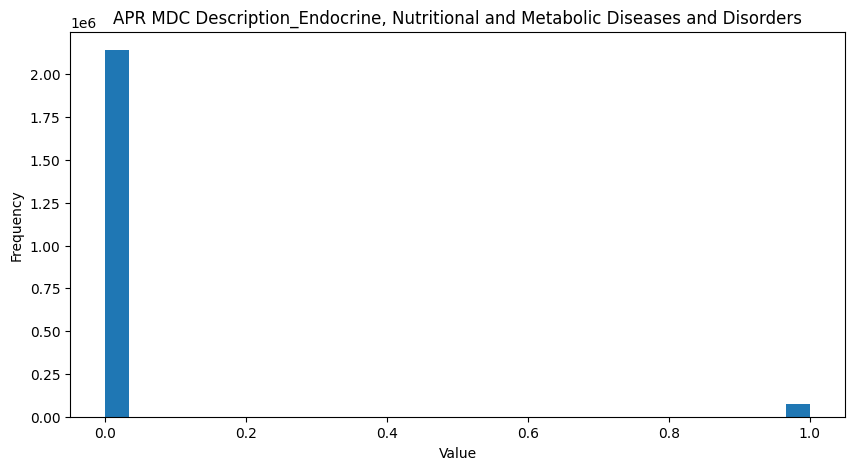

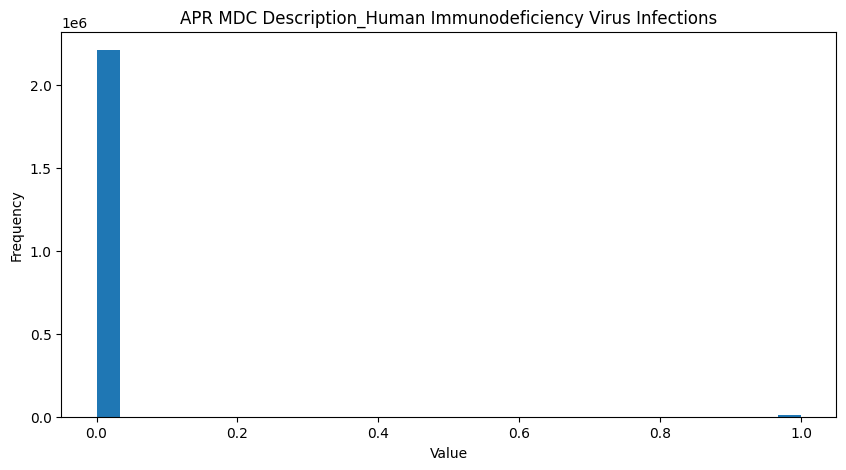

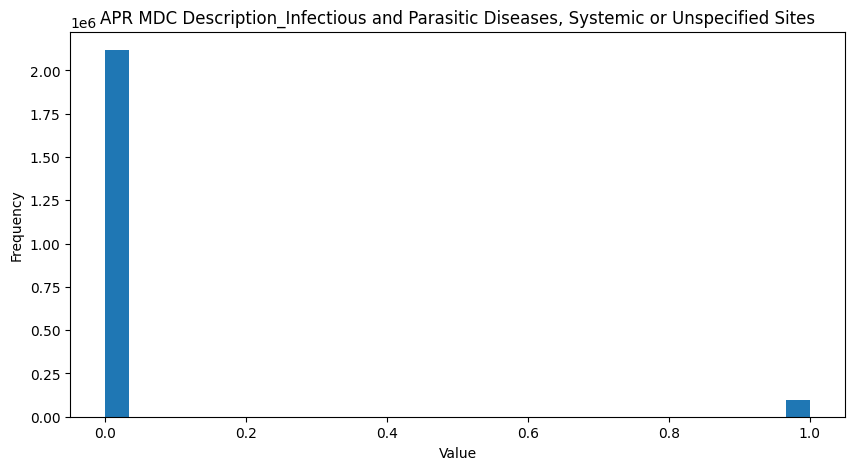

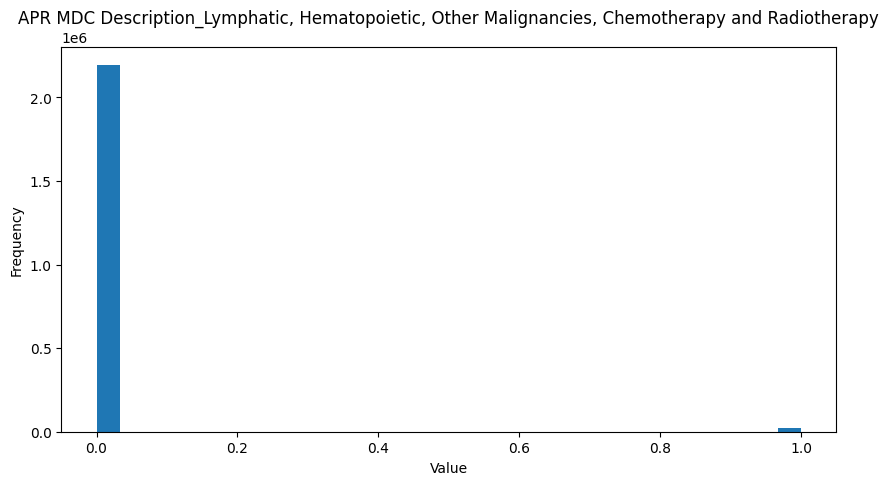

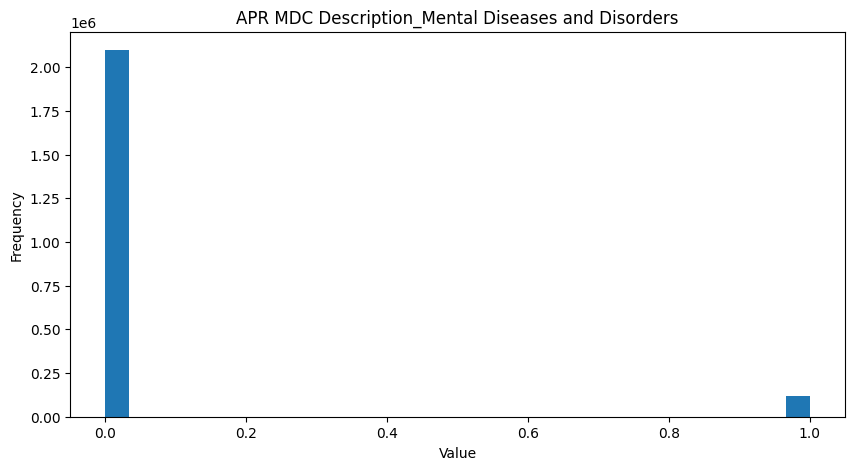

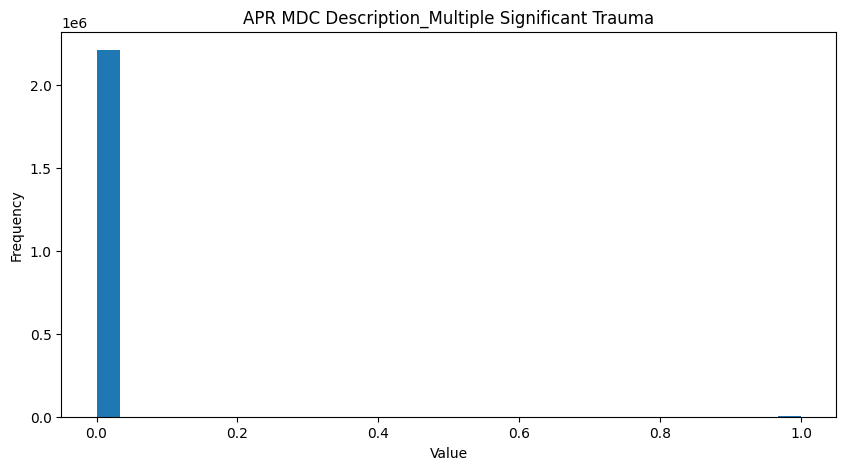

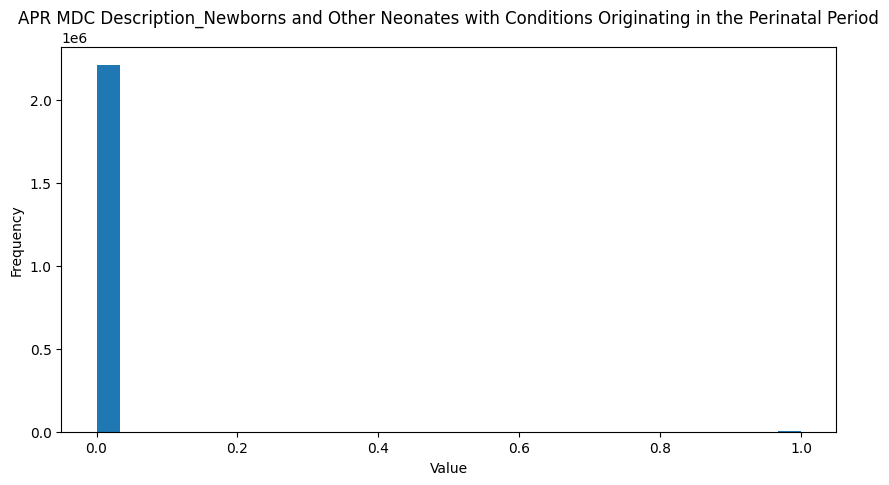

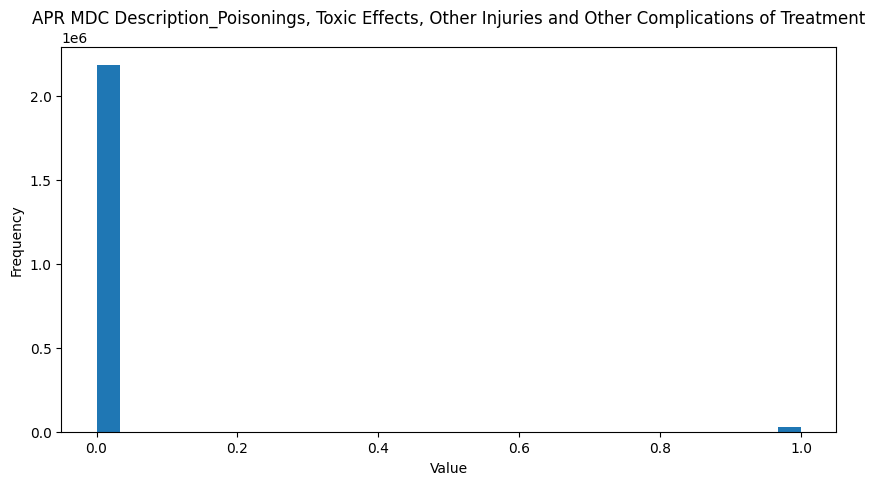

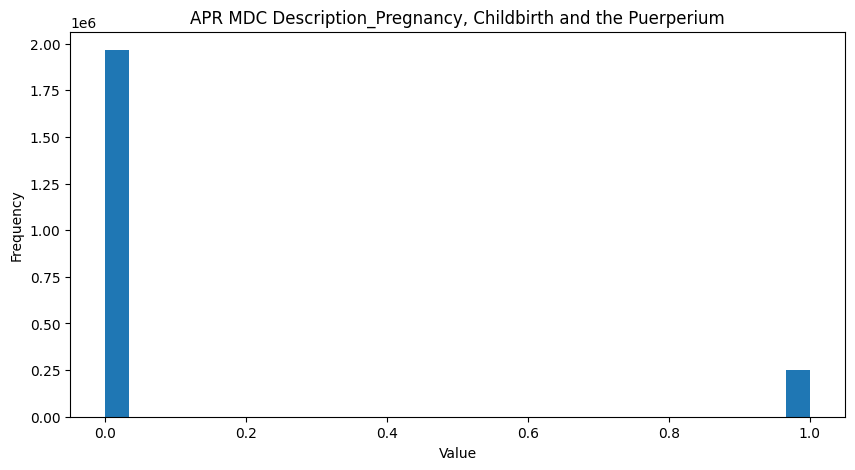

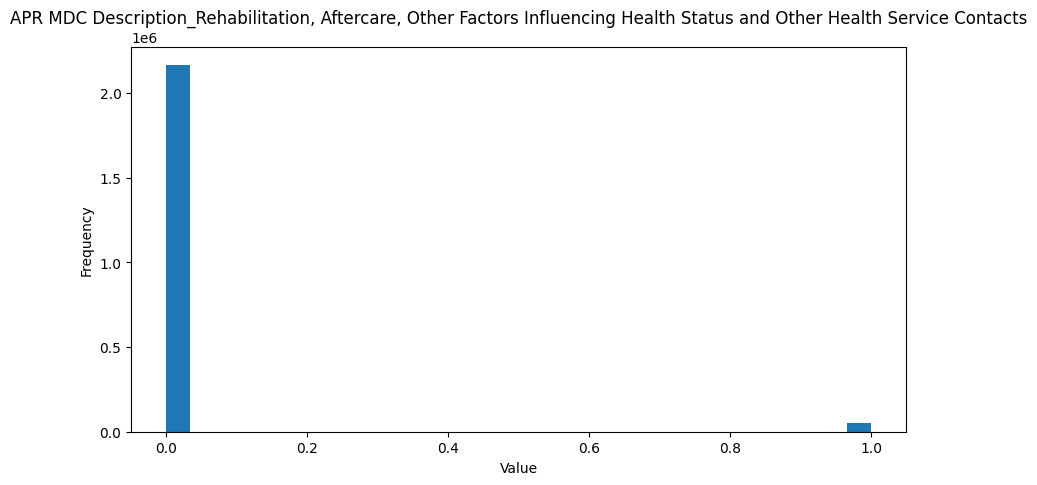

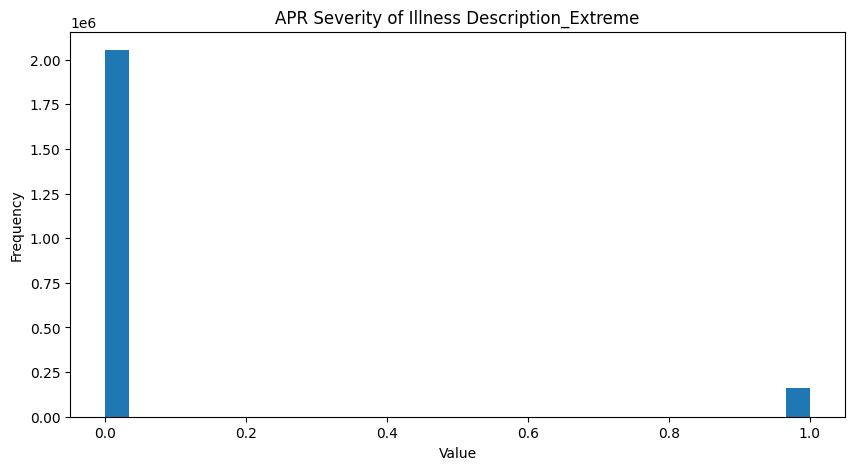

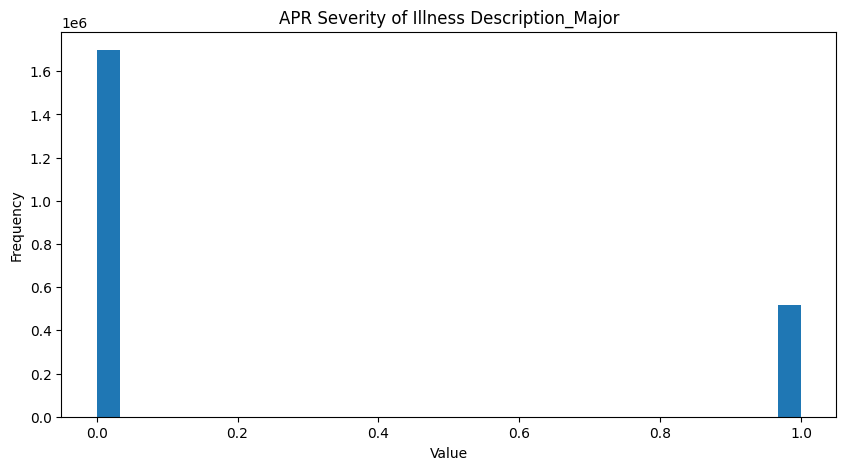

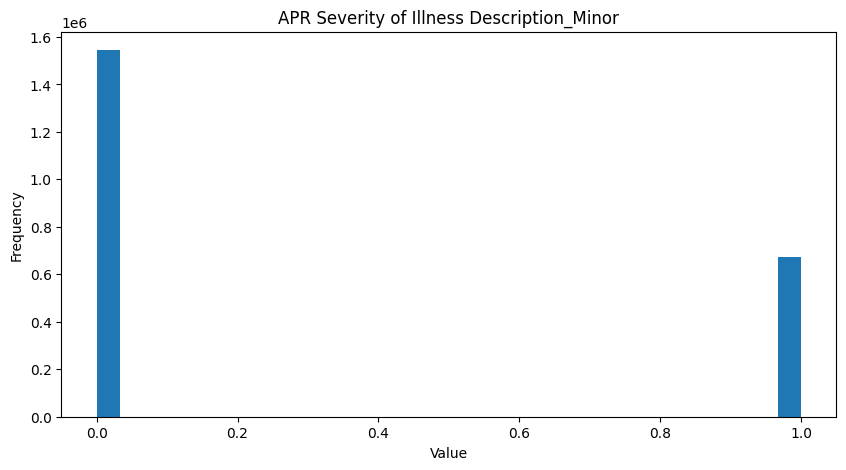

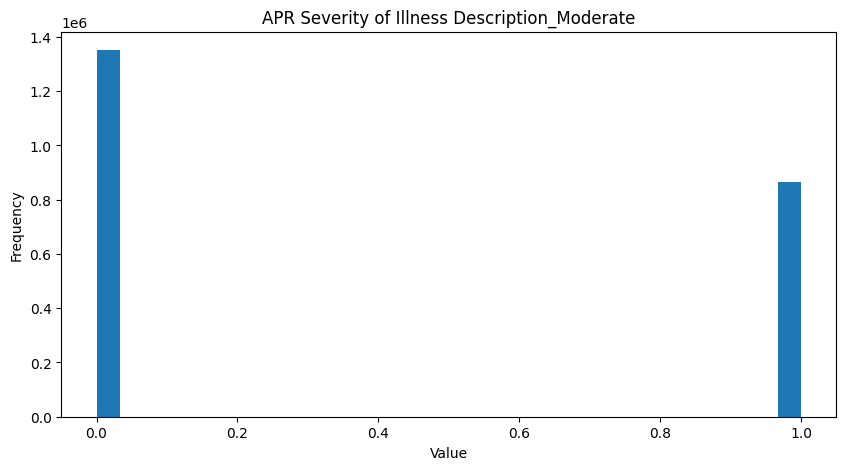

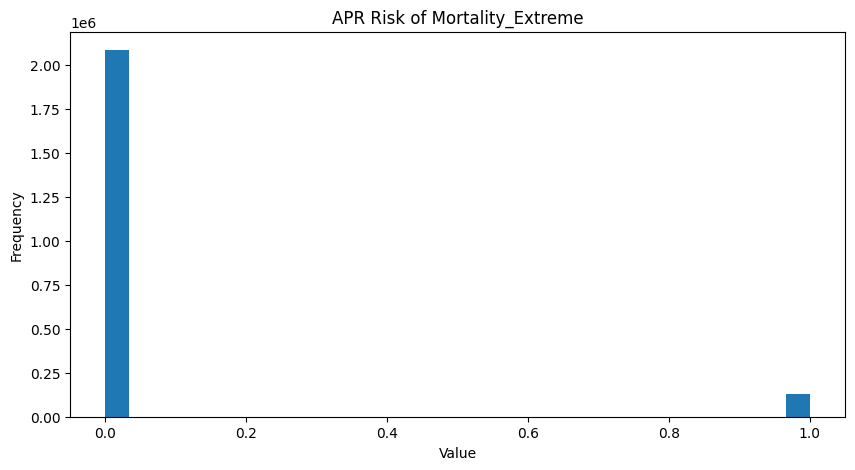

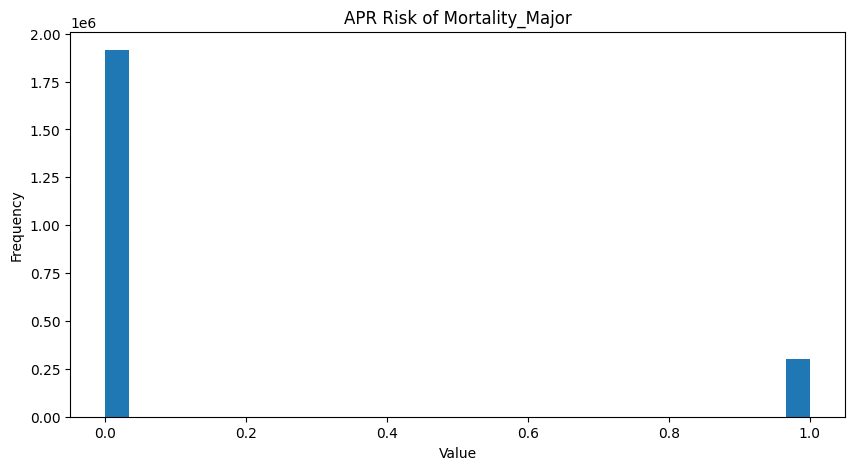

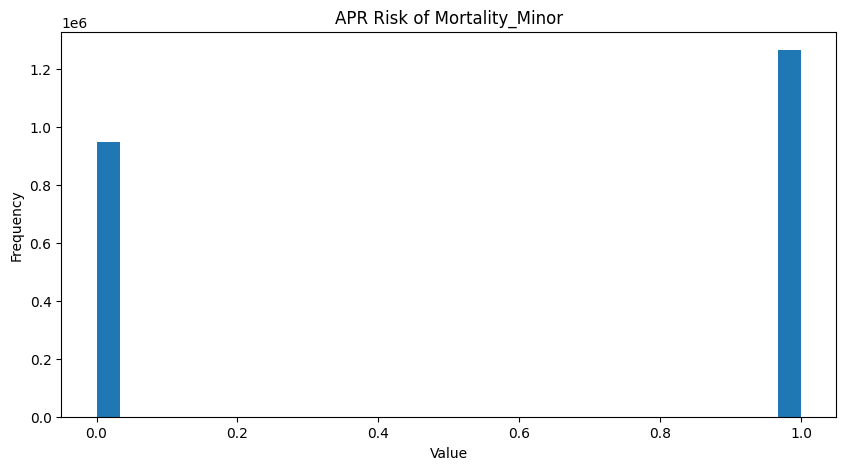

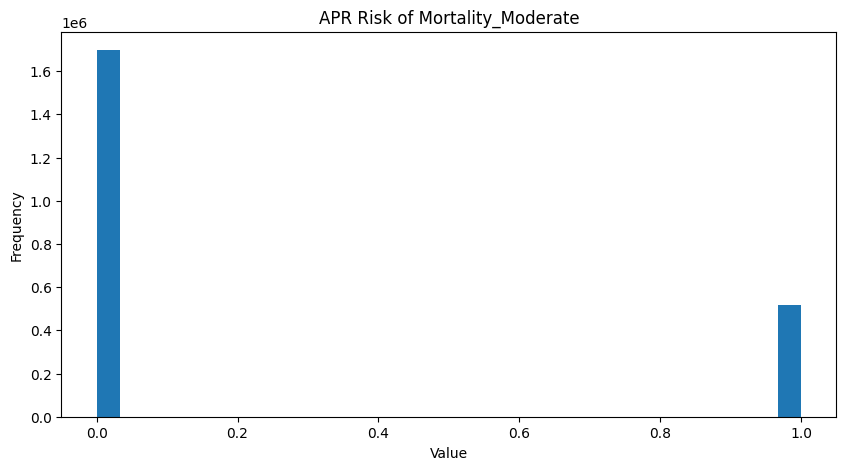

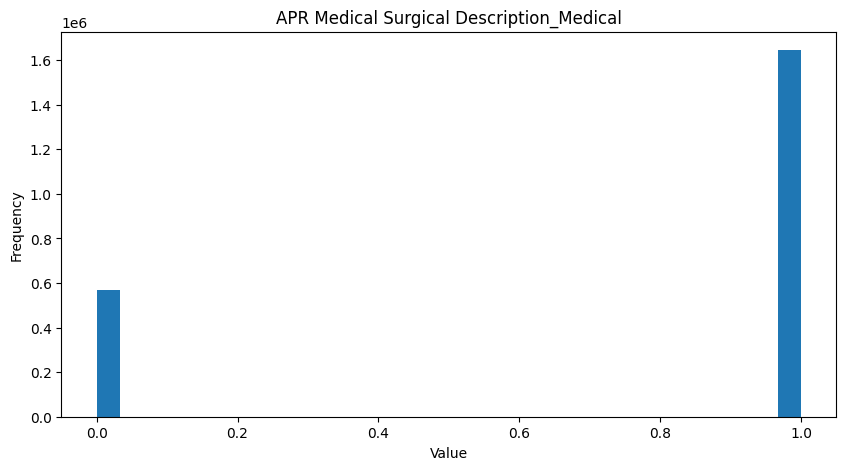

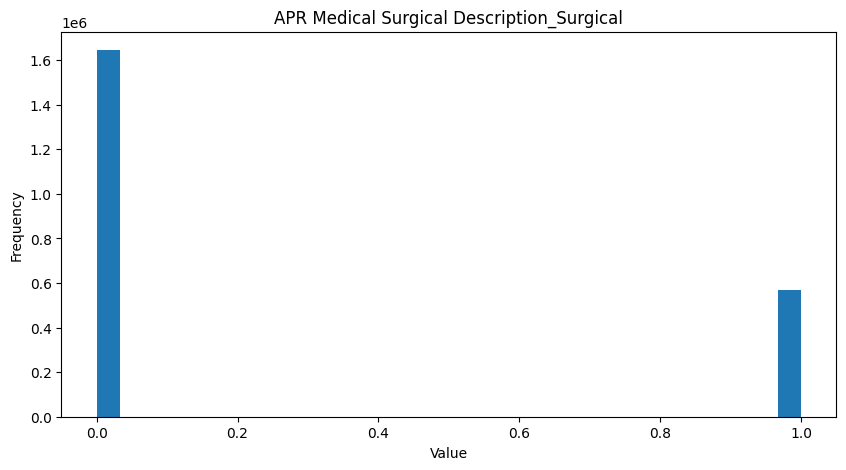

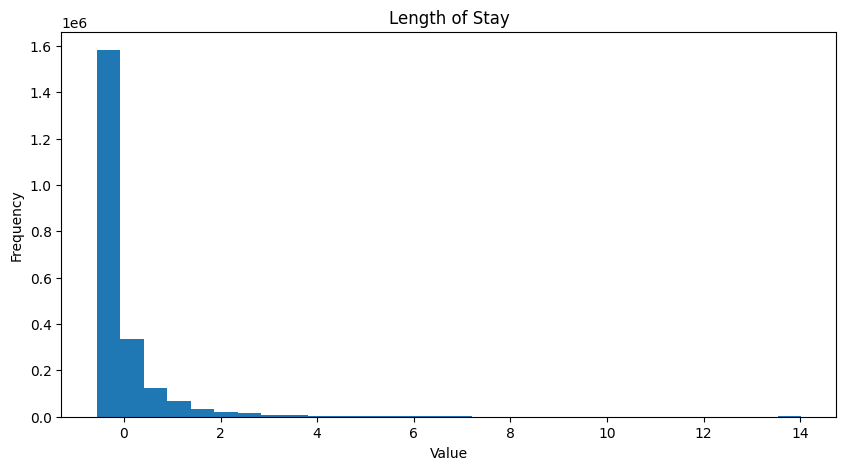

In [ ]:
def plot_vars(df, figsize=(10, 5), bins=30):
    for column in df.columns:
        plt.figure(figsize=figsize)
        plt.hist(df[column], bins=bins)
        plt.title(column)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
        print("")

plot_vars(df_processed)

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

<ipython-input-149-37b029c110e9>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)


,Health Service Area,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description
Health Service Area,1.00,-0.02,0.01,0.26,0.17,0.02,0.11,0.02,-0.04,-0.03,-0.02
Age Group,-0.02,1.00,0.08,0.01,0.00,0.01,-0.00,-0.05,0.01,-0.05,0.03
Gender,0.01,0.08,1.00,-0.01,-0.01,0.05,0.12,-0.09,0.06,0.09,-0.03
Race,0.26,0.01,-0.01,1.00,0.35,0.00,0.05,0.07,-0.04,-0.09,-0.02
Ethnicity,0.17,0.00,-0.01,0.35,1.00,-0.03,0.08,0.01,-0.04,-0.07,-0.03
Length of Stay,0.02,0.01,0.05,0.00,-0.03,1.00,0.05,0.01,0.23,0.22,0.02
Type of Admission,0.11,-0.00,0.12,0.05,0.08,0.05,1.00,-0.28,0.14,0.20,-0.44
APR MDC Description,0.02,-0.05,-0.09,0.07,0.01,0.01,-0.28,1.00,-0.09,-0.21,0.07
APR Severity of Illness Description,-0.04,0.01,0.06,-0.04,-0.04,0.23,0.14,-0.09,1.00,0.39,-0.09
APR Risk of Mortality,-0.03,-0.05,0.09,-0.09,-0.07,0.22,0.20,-0.21,0.39,1.00,-0.09


HEALTH SERVICE AREA


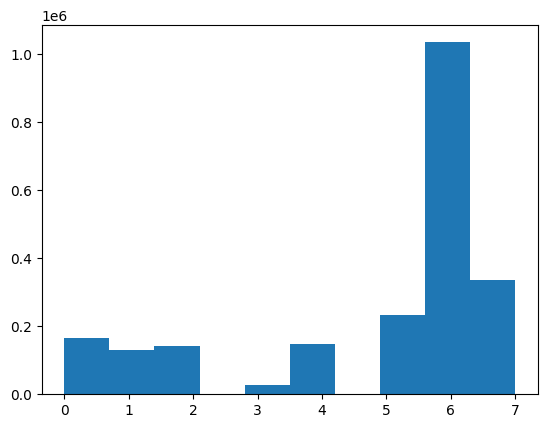


{0: 'Western NY', 1: 'Finger Lakes', 2: 'Central NY', 3: 'Southern Tier', 4: 'Capital/Adirond', 5: 'Hudson Valley', 6: 'New York City', 7: 'Long Island'}


AGE GROUP


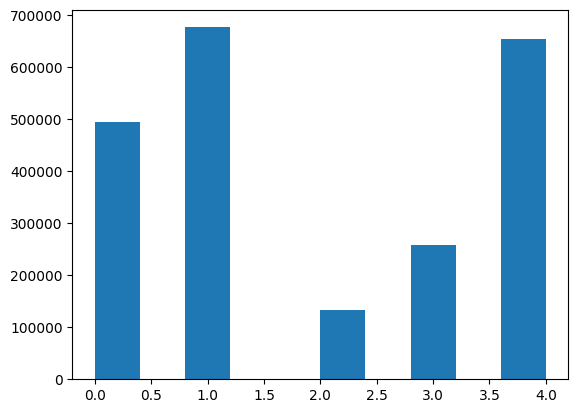


{0: '30 to 49', 1: '70 or Older', 2: '0 to 17', 3: '18 to 29', 4: '50 to 69'}


GENDER


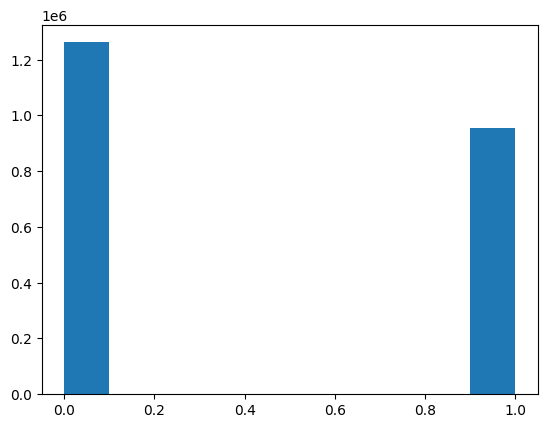


{0: 'F', 1: 'M'}


RACE


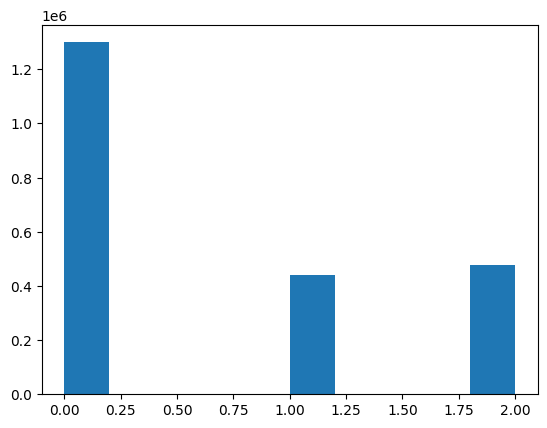


{0: 'White', 1: 'Black/African American', 2: 'Other Race'}


ETHNICITY


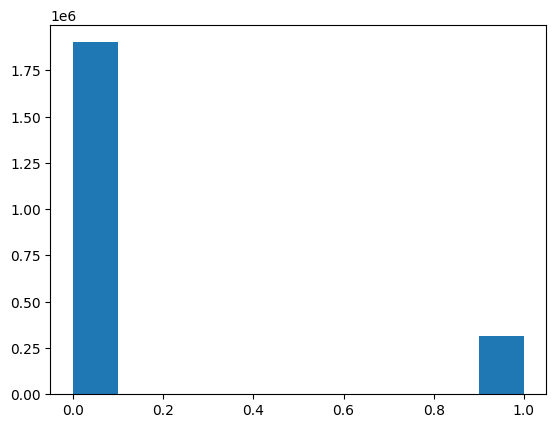


{0: 'Not Span/Hispanic', 1: 'Spanish/Hispanic'}


LENGTH OF STAY


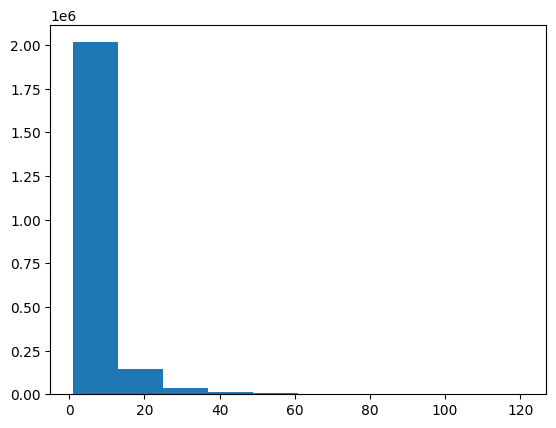





TYPE OF ADMISSION


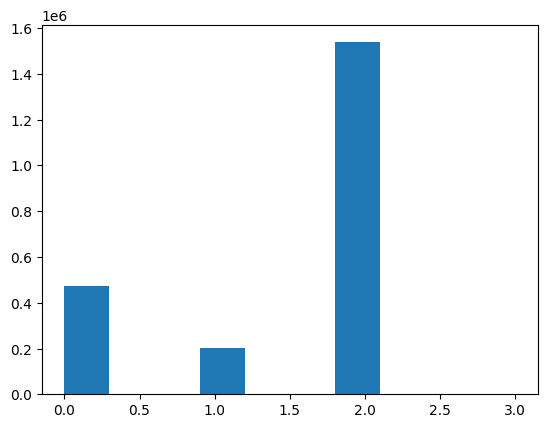


{0: 'Elective', 1: 'Urgent', 2: 'Emergency', 3: 'Trauma'}


APR MDC DESCRIPTION


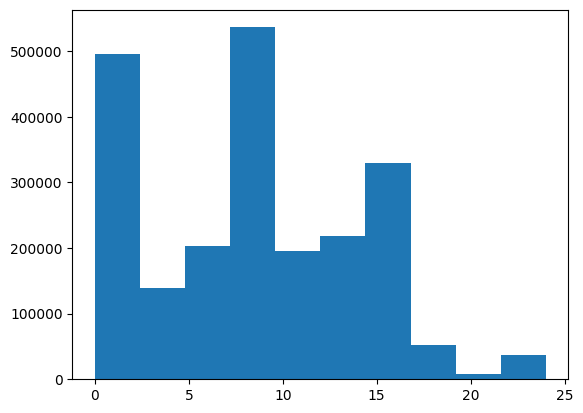


{0: 'Diseases and Disorders of the Respiratory System', 1: 'Diseases and Disorders of the Skin, Subcutaneous Tissue and Breast', 2: 'Diseases and Disorders of the Digestive System', 3: 'Ear, Nose, Mouth, Throat and Craniofacial Diseases and Disorders', 4: 'Diseases and Disorders of the Kidney and Urinary Tract', 5: 'Infectious and Parasitic Diseases, Systemic or Unspecified Sites', 6: 'Endocrine, Nutritional and Metabolic Diseases and Disorders', 7: 'Poisonings, Toxic Effects, Other Injuries and Other Complications of Treatment', 8: 'Diseases and Disorders of the Circulatory System', 9: 'Diseases and Disorders of the Musculoskeletal System and Conn Tissue', 10: 'Diseases and Disorders of the Nervous System', 11: 'Rehabilitation, Aftercare, Other Factors Influencing Health Status and Other Health Service Contacts', 12: 'Mental Diseases and Disorders', 13: 'Diseases and Disorders of the Hepatobiliary System and Pancreas', 14: 'Diseases and Disorders of the Female Reproductive System', 1

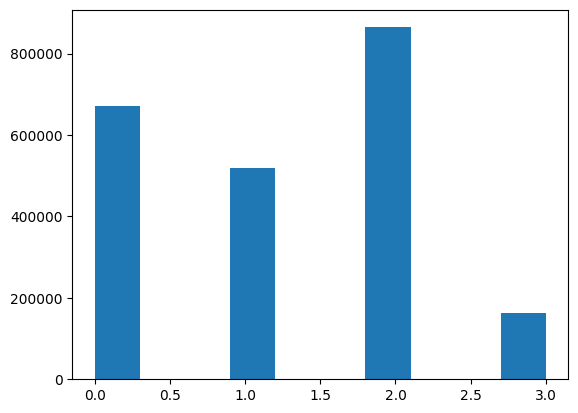


{0: 'Minor', 1: 'Major', 2: 'Moderate', 3: 'Extreme'}


APR RISK OF MORTALITY


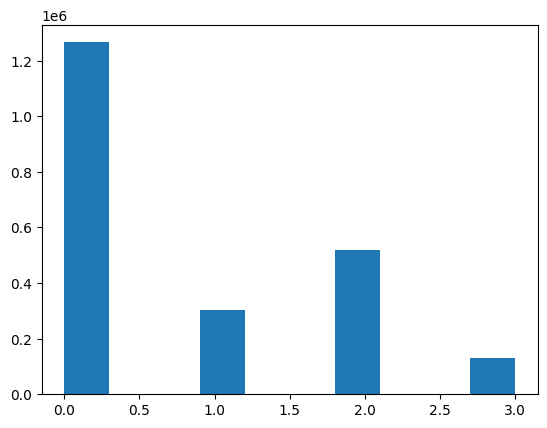


{0: 'Minor', 1: 'Major', 2: 'Moderate', 3: 'Extreme'}


APR MEDICAL SURGICAL DESCRIPTION


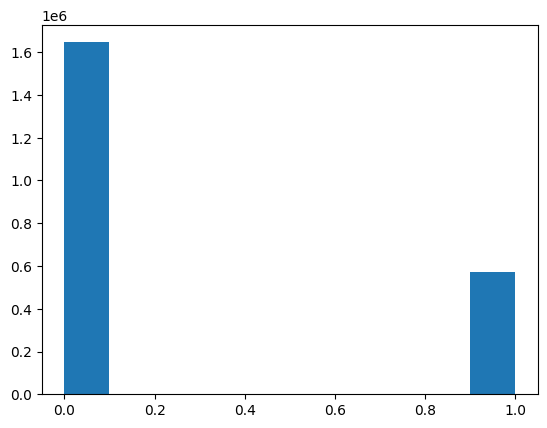


{0: 'Medical', 1: 'Surgical'}




In [ ]:
for var in column_names:
    print(var.upper())
    plot_var(var)
    print("\n")